# Breast Cancer

 Binary Classication for 

 - Logistic Regression: Use method from skicklearn directly
 - Step2: Implement epochs and report best mse / accuracy and r2 
 - Step3: 
 - **Loss Function**



Add Sensitivity / Recall
HyperParameter Tuning?




## Logistic Regression 

### Data Prep

Dataset size:569
The accuracy for this fold is: 0.9655172413793104
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9655172413793104
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9655172413793104
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.8928571428571429
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9642857142857143
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9642857142857143
The accuracy for this fold is: 0.9285714285714286
The accuracy for this fold is: 0.9642857142857143
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9642857142857143
Accuracy Score Mean: 0.978756157635468
Best parameters found: {'alpha': 0.01, 'max_iter': 1000}
Accuracy on the entire dataset: 0.9824253075571178
 

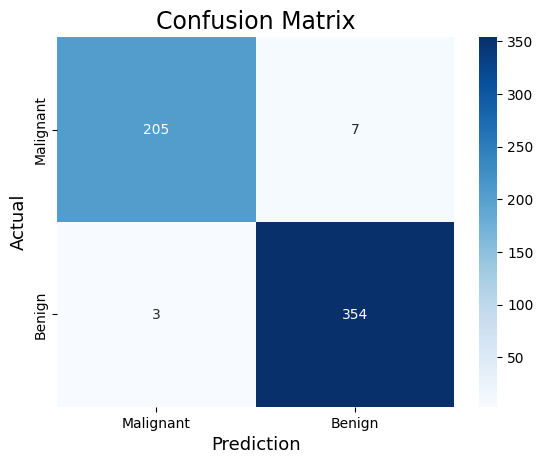

In [102]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

def logisticRegressionWithTuning(X, y, epochs, folds, random_state=None):
    models = []
    accuracy_scores = []
    best_params_list = []
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

        model = SGDClassifier(loss="log_loss", class_weight='balanced', random_state=random_state)
        param_grid = {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 
            'max_iter': [1000, 2000, 3000] 
        }

        #take_care of hyperparameter tuning here -> 
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"The accuracy for this fold is: {accuracy}")
        
        accuracy_scores.append(accuracy) 
        models.append(best_model) 
        best_params_list.append(grid_search.best_params_)

    max_accuracy_index = np.argmax(accuracy_scores)
    best_model_overall = models[max_accuracy_index]
    average_accuracy = np.mean(accuracy_scores)
    best_params = best_params_list[max_accuracy_index]

    print(f"Accuracy Score Mean: {average_accuracy}")
    print(f"Best parameters found: {grid_search.best_params_}")
    
    return average_accuracy, best_model_overall, best_params

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print("Dataset size:{}".format(X.shape[0]))

average_acc, best_model, best_params = logisticRegressionWithTuning(X, y, epochs=100, folds=20, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

best_model = SGDClassifier(loss="log_loss", class_weight='balanced', 
                           alpha=best_params['alpha'], max_iter=best_params['max_iter'], random_state=42)
best_model.fit(X_resampled, y_resampled)


y_pred = best_model.predict(X_scaled)

final_accuracy = accuracy_score(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)
print(f"Accuracy on the entire dataset: {final_accuracy}")

cm = confusion_matrix(y, y_pred)
print(class_report)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cmap='Blues')
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()



Result shows that model is bad at handeling class 1, indicating there are class imbalance during the training process

In [103]:
joblib.dump(best_model, 'log.pkl')

['log.pkl']

# Random Forest

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Best parameters found: {'max_features': 'log2', 'n_estimators': 50}
Accuracy: 0.9649
Confusion Matrix:
[[40  3]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy on entire dataset: 0.9912
Confusion Matrix on entire dataset:
[[208   4]
 [  1 356]]
Classification Report on entire dataset:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       212
           1       0.99      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



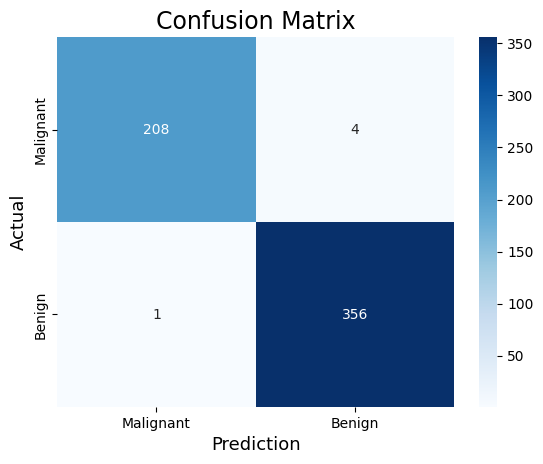

In [50]:
y_pred_all = best_rf_classifier.predict(X)

accuracy_all = accuracy_score(y, y_pred_all)
conf_matrix_all = confusion_matrix(y, y_pred_all)
class_report_all = classification_report(y, y_pred_all)

print(f"Accuracy on entire dataset: {accuracy_all:.4f}")
print("Confusion Matrix on entire dataset:")
print(conf_matrix_all)
print("Classification Report on entire dataset:")
print(class_report_all)


cm = confusion_matrix(y, y_pred_all)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cmap='Blues')
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()



In [107]:
sample_index = 20 # Choose the first sample for simplicity
sample_data = X_test[sample_index]
sample_target = y_test[sample_index]
print(sample_data, sample_target)

[1.380e+01 1.579e+01 9.043e+01 5.841e+02 1.007e-01 1.280e-01 7.789e-02
 5.069e-02 1.662e-01 6.566e-02 2.787e-01 6.205e-01 1.957e+00 2.335e+01
 4.717e-03 2.065e-02 1.759e-02 9.206e-03 1.220e-02 3.130e-03 1.657e+01
 2.086e+01 1.103e+02 8.124e+02 1.411e-01 3.542e-01 2.779e-01 1.383e-01
 2.589e-01 1.030e-01] 0


In [124]:
import joblib
import numpy as np

# Load the models
log_reg_model = joblib.load('log.pkl')
rf_model = joblib.load('rf_model.pkl')

# Sample input data (as a single string)
#sample_input = "1.380e+01 1.579e+01 9.043e+01 5.841e+02 1.007e-01 1.280e-01 7.789e-02 5.069e-02 1.662e-01 6.566e-02 2.787e-01 6.205e-01 1.957e+00 2.335e+01 4.717e-03 2.065e-02 1.759e-02 9.206e-03 1.220e-02 3.130e-03 1.657e+01 2.086e+01 1.103e+02 8.124e+02 1.411e-01 3.542e-01 2.779e-01 1.383e-01 2.589e-01 1.030e-01"
#sample_input = "1.390e+01 1.662e+01 8.897e+01 5.994e+02 6.828e-02 5.319e-02 2.224e-02 1.339e-02 1.813e-01 5.536e-02 1.555e-01 5.762e-01 1.392e+00 1.403e+01 3.308e-03 1.315e-02 9.904e-03 4.832e-03 1.316e-02 2.095e-03 1.514e+01 2.180e+01 1.012e+02 7.189e+02 9.384e-02 2.006e-01 1.384e-01 6.222e-02 2.679e-01 7.698e-02"
sample_input = "1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01 1.223e-01 1.466e-01 8.087e-02 1.931e-01 5.796e-02 4.743e-01 7.859e-01 3.094e+00 4.831e+01 6.240e-03 1.484e-02 2.813e-02 1.093e-02 1.397e-02 2.461e-03 1.926e+01 2.600e+01 1.249e+02 1.156e+03 1.546e-01 2.394e-01 3.791e-01 1.514e-01 2.837e-01 8.019e-02"

# Clean the input string by removing newline characters and extra spaces
sample_input = sample_input.replace('\n', ' ').replace('\r', ' ').strip()
# Convert the cleaned input string to a NumPy array
features = np.fromstring(sample_input, sep=' ').reshape(1, -1)

# Print the features array for verification
print("Features array:")
print(features)

# Make predictions using the models
log_reg_prediction = log_reg_model.predict(features)[0]
rf_prediction = rf_model.predict(features)[0]

print(f"Logistic Regression Prediction: {log_reg_prediction}")
print(f"Random Forest Prediction: {rf_prediction}")


Features array:
[[1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01 1.223e-01 1.466e-01
  8.087e-02 1.931e-01 5.796e-02 4.743e-01 7.859e-01 3.094e+00 4.831e+01
  6.240e-03 1.484e-02 2.813e-02 1.093e-02 1.397e-02 2.461e-03 1.926e+01
  2.600e+01 1.249e+02 1.156e+03 1.546e-01 2.394e-01 3.791e-01 1.514e-01
  2.837e-01 8.019e-02]]
Logistic Regression Prediction: 0
Random Forest Prediction: 0
